# S2DS technical assessment

---



# Background
This exercise will use the [Palmer penguins](https://allisonhorst.github.io/palmerpenguins/articles/art.html) dataset. It contains two tables: the raw data are contained in `penguins_raw.csv` and `penguins.csv` is a curated subset of these data. You will need both for this exercise. A description of the dataset can be found [here](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/) that includes the following background information:

> The `palmerpenguins` data contains size measurements, clutch observations, and blood isotope ratios for three penguin species observed on three islands in the Palmer Archipelago, Antarctica over a study period of three years. These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were imported directly from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the Palmer Station Data Policy. We gratefully acknowledge Palmer Station LTER and the US LTER Network. Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use. 

This exercise will help Pivigo understand your coding and technical skills. It is designed to be difficult to complete in the time allowed, so don't be discouraged if you can't complete all of the questions. 

**Please take the time to read each question carefully!** 

Good luck!

# Setup
Install libraries and load data.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

penguins = pd.read_csv("Data/penguins.csv")

penguins_raw = pd.read_csv("Data/penguins_raw.csv")

penguins.head(10)
#penguins_raw.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


***

## Question 01
How many columns are in the `penguins_raw.csv` dataset?

In [18]:
penguins_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

**Answer:**

17 columns

***

## Question 02
How many distinct islands are represented in the dataset?

In [19]:
penguins_raw["Island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

**Answer:**

3 islands 'Torgersen', 'Biscoe', 'Dream'

***

## Question 03
How many Chinstrap Penguins are found on Dream Island in the `penguins.csv` dataset?


In [20]:
#penguins.head()

chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]
#chinstrap_penguins.info()
dream_island_chinstrap = chinstrap_penguins[chinstrap_penguins["island"] == "Dream"]
dream_island_chinstrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 276 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            68 non-null     object 
 1   island             68 non-null     object 
 2   bill_length_mm     68 non-null     float64
 3   bill_depth_mm      68 non-null     float64
 4   flipper_length_mm  68 non-null     float64
 5   body_mass_g        68 non-null     float64
 6   sex                68 non-null     object 
 7   year               68 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.0+ KB


**Answer:**

68 penguins

***

## Question 04
What is the date of the first recording (column `Date Egg`) in the `penguins_raw.csv`?

In [21]:
penguins_raw["Date Egg"] = pd.to_datetime(penguins_raw["Date Egg"])

first_date = min(penguins_raw["Date Egg"])

first_date


Timestamp('2007-11-09 00:00:00')

**Answer:**

date of first recording is 2007-11-09

***

## Question 05
What day of week was this?

In [22]:
first_date.day_name()

'Friday'

**Answer:**

it was Friday

***

## Question 06
What is the median body mass of male Adelie penguins in the `penguins.csv` dataset?

In [23]:

adelie = penguins[penguins["species"] == "Adelie"]
adelie_males = adelie[adelie["sex"] == "male"]

median_male = adelie_males["body_mass_g"].median()

median_male
#penguins.head()

4000.0

**Answer:**

4000.0 g

***

## Question 07
What is the mean body mass of male Adelie penguins in the `penguins.csv` dataset (rounded to the nearest gram)?

In [24]:
mean_male = adelie_males["body_mass_g"].mean().round()

mean_male

4043.0

**Answer:**

4043.0 g

***

## Question 08
Please show how you would create a plot showing the differences in the distributions of flipper length (`penguins.csv`) between males and females and **across species**.

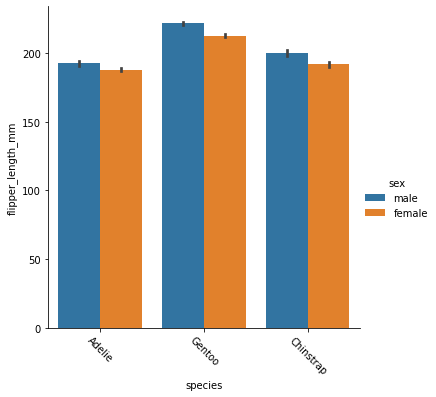

In [25]:
import seaborn as sns

# factor plot
g = sns.factorplot(x='species',
                    y='flipper_length_mm',
                    data=penguins,
                    hue='sex',
                    kind='bar')
# rotate x-axis labels
g.set_xticklabels(rotation=-45)

## Question 09
Please write a function that generalises the approach you used in Question 08 to show the distribution of any variable between males and females across species. The function should take one parameter as input, the variable name as a string.

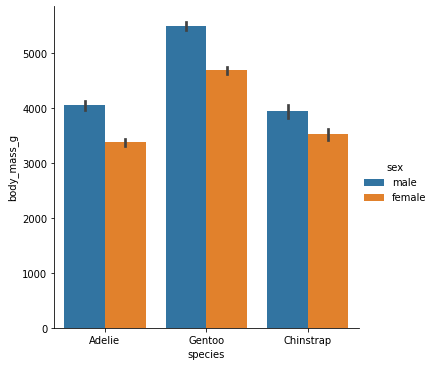

In [26]:
def plt_across_species(interest_var):
    g = sns.factorplot(x='species',
                    y=interest_var,
                    data=penguins,
                    hue='sex',
                    kind='bar')
plt_across_species('body_mass_g')

## Question 10
One might predict that as penguin bills get longer, they would also increase depth. What is the correlation between these two variables in the `penguins.csv` dataset (if you remove missing values)? Please round to two decimal place.

In [27]:
#remove missing values
penguins['bill_length_mm'] = penguins['bill_length_mm'].dropna()
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].dropna()

correlation = penguins['bill_length_mm'].corr(penguins['bill_depth_mm'])

correlation.round(2)


-0.24

**Answer:**

The correlation between length and depth of penguin's bill is -0.24. The negative correlation shows that the statement of penguins bills getting deeper as they get longer is wrong.

***

## Question 11
The hypothesis posed in Question 10 appears to be incorrect. This is verified by the scatter plot below:

![](data/q10.png)

Please show us ways you might investigate this further. (Hint: Consider other variable that might be confounding the observed effect)

I looked up information about a penguin's bill and I found out the the longer the bill, the thinner it is, therefore not very deep. Depth is higher in short bill penguins who eat krill (a really small crustaceous), because they need to ingest a large quantity of it.

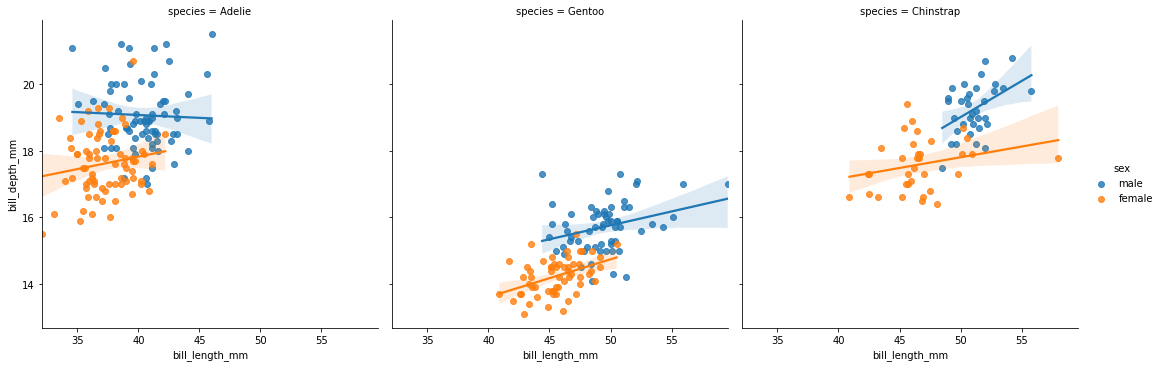

In [55]:
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", 
           col="species", # Categorical variables that will determine the faceting of the grid.
           hue="sex", # Grouping variable that will produce elements with different colors.
           data=penguins)

In [51]:
def correlation_sex_species(df):
    for sex in df['sex'].unique():
        for species in df['species'].unique():
            new_df = df[(df['sex'] == sex) & (df['species'] == species)]
            print(sex + "-" + species + ': ' + str(new_df['bill_length_mm'].corr(new_df['bill_depth_mm']).round(2)))

correlation_sex_species(penguins.dropna())

male-Adelie: -0.04
male-Gentoo: 0.31
male-Chinstrap: 0.45
female-Adelie: 0.16
female-Gentoo: 0.43
female-Chinstrap: 0.26
